# DAILLY Thomas _ Examen ADDM

Pour ce projet, nous allons nous intéresser à la base de données `horodateurs` qui représente l'ensemble des transactions sur les horodateurs dans la ville de Paris sur l'année 2014.
Commençons tout d'abord par importer la librairie `pymongo` et créons une connexion entre `python` et _MongoDB_ en utilisant la fonction `MongoClient()` (on importe également la librairie `pprint` qui nous permettra d'améliorer l'affichage de nos résultats ainsi que la librairie `pandas` pour passer nos résultats sous le format _dataframe_) :

In [1]:
import pandas
import pprint
import pymongo

connexion = pymongo.MongoClient("mongodb://193.51.82.104:2343/")

Par l'intermédiaire de l'objet `connexion`, on récupère la base `horodateurs` que nous allons pouvoir ranger dans l'objet `horo` afin de la manipuler par la suite.

In [2]:
horo = connexion.horodateurs
horo.list_collection_names()

['transactions_small', 'myresults', 'transactions', 'mobiliers']

Il s'agit donc d'une base de données comportant quatre collections de données. Pour ce projet, nous nous focaliserons surtout sur les deux collections principales de cette base de données : la collection `transactions` qui contient l'ensemble des paiements et la collection `mobiliers` listant tous les horodateurs de la ville de Paris.
Dans un premier temps, nous pouvons calculer le nombre de transactions par arrondissement.

Toutefois, la collection `transactions` comporte un trop grand nombre de documents tandis que la collection `transactions_small` est un échantillon réduit de transactions (1%) comme nous pouvons le voir à l'aide des deux lignes de code ci-dessous :

In [3]:
print(horo.transactions.estimated_document_count())
print(horo.transactions_small.estimated_document_count())

24448030
244480


De ce fait, à l'occasion de ce projet, nous manipulerons plutôt la collection `transactions_small` en raison du temps d'exécution des codes trop important avec la collection `transactions`.

Commençons tout d'abord par déterminer le nombre de transactions par arrondissement.
On réalise, dans un premier temps, un dataframe représentant les quantités souhaitées comme suit :

In [4]:
nb_transactions = pandas.DataFrame(list(horo.mobiliers.aggregate([
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    }},
    { "$unwind" : "$transaction"},
    { "$group" : { "_id" : "$fields.arrondt", "nb" : { "$sum" : 1 }}},
    { "$project": { "Arrondissement": "$_id", "Nombre de transactions": "$nb", "_id": 0 }},
    { "$sort" : {"Arrondissement": 1}}
])))
nb_transactions

,Arrondissement,Nombre de transactions
0,1,2539
1,2,1787
2,3,4250
3,4,3884
4,5,9005
5,6,6784
6,7,12024
7,8,15113
8,9,8021
9,10,5487


On obtient ainsi le dataframe souhaité. Dans un second temps, nous pouvons représenter graphiquement nos précédents résultats à l'aide d'un diagramme en bâtons. On importe le package `seaborn` et on génère le graphique en plaçant la variable `Arrondissement` en abscisse et la variable `Nombre de transactions` en ordonnée.

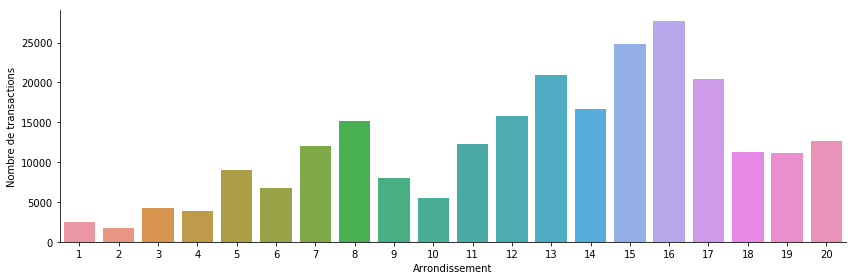

In [5]:
import seaborn


%matplotlib inline

seaborn.catplot(x = "Arrondissement", y = "Nombre de transactions",
                data = nb_transactions, kind = "bar", height = 4, aspect = 3)

On s'aperçoit ainsi que le seizième arrondissement est celui ayant connu le plus grand nombre de transactions (27 718) tandis que l'arrondissement parisien ayant eu le moins de transactions parmi tous est le deuxième (1 787).

Nous pouvons également calculer le montant total et le montant moyen des transactions par arrondissement.
Commençons par calculer le montant total des transactions par arrondissement :

In [153]:
montant_total = pandas.DataFrame(list(horo.mobiliers.aggregate([
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    }},
    { "$unwind" : "$transaction"},
    { "$group" : { "_id" : "$fields.arrondt", "Total" : { "$sum" : "$transaction.montant carte" }}},
    { "$project": { "Arrondissement": "$_id", "Total des transactions (en €)": "$Total", "_id": 0 }},
    { "$sort": {"Arrondissement": 1}}
])))
montant_total

,Arrondissement,Total des transactions (en €)
0,1,10083.67
1,2,7466.09
2,3,16828.43
3,4,14237.47
4,5,32905.31
5,6,25233.70
6,7,45635.66
7,8,52881.66
8,9,24646.26
9,10,15431.90


On représente alors graphiquement ce dataframe comme suit :

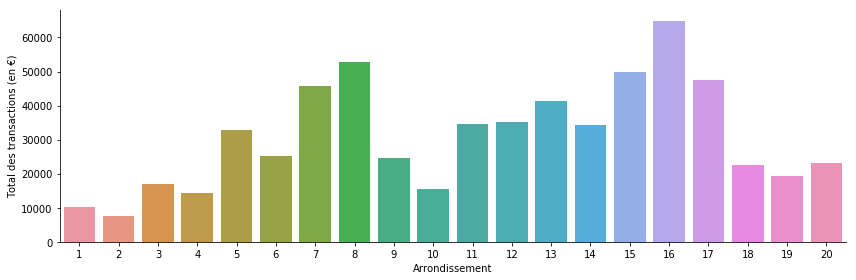

In [154]:
seaborn.catplot(x = "Arrondissement", y = "Total des transactions (en €)",
                data = montant_total, kind = "bar", height = 4, aspect = 3)

On peut ainsi en déduire que le deuxième arrondissement est l'arrondissement dont le total des transactions est le plus faible (7 466,09 euros) alors que le seixième arrondissement est en tête de ce classement (64 843,64 euros).

Intéressons-nous enfin à la moyenne des transactions par arrondissement en suivant les démarches analogues (dataframe puis graphique).

In [155]:
montant_moyen = pandas.DataFrame(list(horo.mobiliers.aggregate([
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    }},
    { "$unwind" : "$transaction"},
    { "$group" : { "_id" : "$fields.arrondt", "Total" : { "$avg" : "$transaction.montant carte" }}},
    { "$project": { "Arrondissement": "$_id", "Moyenne des transactions (en €)": "$Total", "_id": 0 }},
    { "$sort": {"Arrondissement": 1}}
])))
montant_moyen

,Arrondissement,Moyenne des transactions (en €)
0,1,3.971512
1,2,4.178002
2,3,3.959631
3,4,3.665672
4,5,3.654115
5,6,3.719590
6,7,3.795381
7,8,3.499084
8,9,3.072717
9,10,2.812448


En s'appuyant sur ces résultats, on génère le graphique suivant :

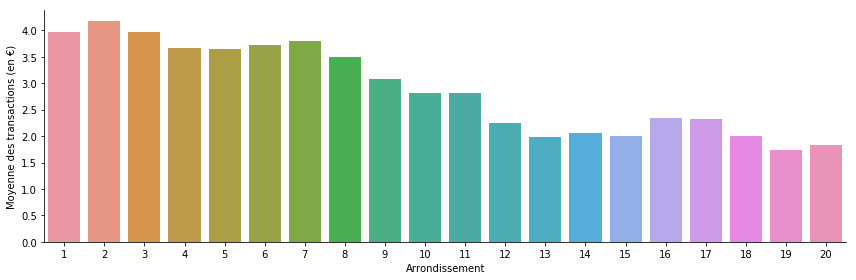

In [156]:
seaborn.catplot(x = "Arrondissement", y = "Moyenne des transactions (en €)",
                data = montant_moyen, kind = "bar", height = 4, aspect = 3)

A la lecture du précédent graphique, on peut constater que le dix-neuvième arrondissement a la plus faible moyenne des transactions dans Paris (1,744251 euros) alors que le deuxième arrondissement est celui dont la moyenne des transactions est la plus élevée (4,178002 euros).

Nous allons maintenant réaliser des cartes multiples de type _small multiples_. Nous allons représenter la répartition des différents types de mobiliers dans Paris.

In [10]:
import folium
import json

geo = json.load(open("paris-arrondissements.geojson"))

centre = [48.86, 2.35]
carte = folium.Map(location = centre, zoom_start = 12)
carte.choropleth(geo_data = geo)
carte

/opt/conda/lib/python3.6/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


On obtient ci-dessus une carte centrée sur Paris où notre ville d'intérêt est coloriée en bleue et où ses arrondissements sont bien délimités par une bordure noire.
Pour commencer, on peut essayer de placer un marqueur localisant l'horodateur ayant eu le total des transactions le plus important de tous ainsi qu'un autre marqueur localisant l'horodateur avec un total des transactions le plus faible.
Cherchons donc ces deux horodateurs :

In [11]:
horomax = pandas.DataFrame(list(horo.mobiliers.aggregate([
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    }},
    { "$unwind" : "$transaction"},
    { "$group" : { "_id" : "$fields.numhoro", "Total" : {"$sum" : "$transaction.montant carte" }}},
    { "$project": { "Horodateur": "$_id", "Total des transactions": "$Total", "_id": 0}},
    { "$sort": {"Total des transactions": -1}},
    { "$limit": 1}
])))
horomax

,Horodateur,Total des transactions
0,27070208,997.1


On retrouve donc les coordonnées géographiques de l'horodateur numéroté 270702208 :

In [12]:
pprint.pprint(list(horo.mobiliers.find({ "fields.numhoro": 27070208 }, {"fields.geo_point_2d": 1, "_id": 0})))

[{'fields': {'geo_point_2d': [48.84280400017509, 2.323681999632239]}}]


De façon analogue, on cherche l'horodateur avec le total des transactions le plus faible de Paris avant de récupérer ses coordonnées géographiques :

In [13]:
horomin = pandas.DataFrame(list(horo.mobiliers.aggregate([
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    }},
    { "$unwind" : "$transaction"},
    { "$group" : { "_id" : "$fields.numhoro", "Total" : {"$sum" : "$transaction.montant carte" }}},
    { "$project": { "Horodateur": "$_id", "Total des transactions": "$Total", "_id": 0}},
    { "$sort": {"Total des transactions": 1}},
    { "$limit": 1}
])))
horomin

,Horodateur,Total des transactions
0,13780102,0.25


On récupère alors les coodonnées géographiques de l'horodateur numéroté 13780102 :

In [15]:
pprint.pprint(list(horo.mobiliers.find({ "fields.numhoro": 13780102 }, {"fields.geo_point_2d": 1, "_id": 0})))

[{'fields': {'geo_point_2d': [48.872500999878305, 2.373072000371473]}}]


Maintenant que nous avons les coordonnées géographiques de nos deux horodateurs d'intérêt, nous allons ajouter deux marqueurs à notre carte, ceux-ci représentant leur emplacement exact respectif.

In [16]:
folium.Marker([48.84280400017509, 2.323681999632239], popup='Maximum des transactions (997.10€)').add_to(carte)
folium.Marker([48.872500999878305, 2.373072000371473], popup='Minimum des transactions (0.25€)').add_to(carte)
carte

Nous pouvons également générer une carte représentant la répartition des différents types de mobilier dans Paris. Pour cela, nous regardons tout d'abord quels sont les différents types de mobiliers dont nous disposons :

In [17]:
horo.mobiliers.distinct("fields.regime")

['MIX', 'ROT']

Dans la mesure où l'on va chercher à représenter graphiquement la répartition de ces deux types de mobiliers dans Paris, il nous est nécessaire de déterminer l'item dans le GeoJSON avec lequel nous ferons la jointure entre nos futures informations et la future carte.

In [18]:
geo.keys()

dict_keys(['type', 'features'])

In [152]:
pprint.pprint(geo["features"][0]['properties'])

{'c_ar': 2,
 'c_arinsee': 75102,
 'geom_x_y': [48.86827922252252, 2.3428025468913636],
 'highlight': {},
 'l_ar': '2ème Ardt',
 'l_aroff': 'Bourse',
 'longueur': 4553.93876373,
 'n_sq_ar': 750000002,
 'n_sq_co': 750001537,
 'objectid': 2,
 'perimetre': 4554.10435957,
 'style': {'color': 'black',
           'fillColor': '#d53e4f',
           'fillOpacity': 0.6,
           'opacity': 1,
           'weight': 1},
 'surface': 991153.74474596}


Ici, l'item qui nous servira pour la jointure sera `c_ar` qui donne le numéro de l'arrondissement.
Mais tout d'abord, commençons par récupérer un tableau de valeurs nous indiquant le nombre de mobiliers en fonction cette fois-ci de deux critères : l'arrondissement et le régime (`MIX` pour mixte et `ROT` pour rotatif).

In [20]:
regime = pandas.DataFrame(list(horo.mobiliers.aggregate([
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    }},
    { "$unwind" : "$transaction"},
    { "$group" : { "_id" : {"Arrondissement": "$fields.arrondt", "Régime": "$fields.regime"}, "nb" : { "$sum" : 1 }}},
    { "$project": { "Arrondissement": "$_id.Arrondissement", "Régime": "$_id.Régime", "Nombre d'horodateurs": "$nb", "_id": 0 }},
    { "$sort" : {"Arrondissement": 1}}
])))
regime

,Arrondissement,Nombre d'horodateurs,Régime
0,1,994,ROT
1,1,1545,MIX
2,2,624,ROT
3,2,1163,MIX
4,3,2189,MIX
5,3,2061,ROT
6,4,610,ROT
7,4,3274,MIX
8,5,1337,ROT
9,5,7668,MIX


On obtient ainsi un data frame de 40 lignes où chaque arrondissement apparaît deux fois puisqu'on détermine le nombre d'horodateurs par arrondissement en fonction du régime de l'horodateur.
Représentons maintenant, à l'aide d'un graphique, la répartition des horodateurs dont le régime est " ROT " dans la ville de Paris :

In [135]:
# On récupère, à partir de la colonne "Nombre d'horodateurs", les valeurs de celle-ci pour lesquelles l'horodateur est rotatif
rotatif = regime["Nombre d'horodateurs"][regime["Régime"]=="ROT"]

# On réinitialise l'index de sorte à obtenir un index allant de 0 à 19 par pas de 1
rotatif = rotatif.reset_index()
del(rotatif["index"])

# On récupère, à partir de la colonne "Arrondissement", les valeurs de celle-ci pour lesquelles l'horodateur est rotatif
arrondt = regime["Arrondissement"][regime["Régime"]=="ROT"]

# On réinitialise l'index de sorte à obtenir un index allant de 0 à 19 par pas de 1
arrondt = arrondt.reset_index()
del(arrondt["index"])

# On crée enfin un data frame à partir de nos données " rotatif " et " arrondt "
d_rotatif = pandas.DataFrame({"Nombre d'horodateurs rotatifs": rotatif["Nombre d'horodateurs"], "Arrondissement": arrondt["Arrondissement"]})
d_rotatif

,Nombre d'horodateurs rotatifs,Arrondissement
0,994,1
1,624,2
2,2061,3
3,610,4
4,1337,5
5,1380,6
6,559,7
7,3195,8
8,3116,9
9,1013,10


Nous sommes ainsi en mesure de générer une carte se basant sur un code couleur permettant de modéliser la répartition des horodateurs rotatifs pour chaque arrondissement parisien.

In [136]:
carte = folium.Map(location = centre, zoom_start = 12)
carte.choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                   data = d_rotatif, columns = ["Arrondissement", "Nombre d'horodateurs rotatifs"],
                   fill_color = 'Spectral',
                   legend_name = "Nombre horodateurs rotatifs")
carte

/opt/conda/lib/python3.6/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


A la lecture de cette carte, on remarque que le quinzième arrondissement et le treizième arrondissement sont les endroits où l'on localise le plus d'horodateurs rotatifs tandis que le centre de Paris en est le moins pourvu.

On répète le même procécédé pour les horodateurs mixtes :

In [36]:
# On récupère, à partir de la colonne "Nombre d'horodateurs", les valeurs de celle-ci pour lesquelles l'horodateur est mixte
mixte = regime["Nombre d'horodateurs"][regime["Régime"]=="MIX"]

# On réinitialise l'index de sorte à obtenir un index allant de 0 à 19 par pas de 1
mixte = mixte.reset_index()
del(mixte["index"])

# On récupère, à partir de la colonne "Arrondissement", les valeurs de celle-ci pour lesquelles l'horodateur est mixte
arrondt = regime["Arrondissement"][regime["Régime"]=="MIX"]

# On réinitialise l'index de sorte à obtenir un index allant de 0 à 19 par pas de 1
arrondt = arrondt.reset_index()
del(arrondt["index"])

# On crée enfin un data frame à partir de nos données " rotatif " et " arrondt "
d_mixte = pandas.DataFrame({"Nombre d'horodateurs mixtes": mixte["Nombre d'horodateurs"], "Arrondissement": arrondt["Arrondissement"]})
d_mixte

,Nombre d'horodateurs mixtes,Arrondissement
0,1545,1
1,1163,2
2,2189,3
3,3274,4
4,7668,5
5,5404,6
6,11465,7
7,11918,8
8,4905,9
9,4474,10


On affiche alors la carte de la répartition des horodateurs mixtes à Paris :

In [40]:
# Problème rencontré : Ce code n'a pas été exécuté car il semblerait que les cartes prennent un trop grand espace de sauvegarde
## dans la mesure où lorsque ce dernier est exécuté, le message " Request Entity Too Large " apparaît et il nous est alors
### impossible de sauvegarder.
carte = folium.Map(location = centre, zoom_start = 12)
carte.choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                   data = d_mixte, columns = ["Arrondissement", "Nombre d'horodateurs mixtes"],
                   fill_color = 'Spectral',
                   legend_name = "Nombre horodateurs mixtes")
carte

Néanmoins, nous soulignons le fait que les arrondissements comptant le plus grand nombre d'horodateurs mixtes sont ceux du Sud-Ouest parisien (quinzième et seizième arrondissement) alors que le centre de Paris semble en dénombrer le moins par rapport au reste de la ville.

On peut également déterminer le total des transactions dans tout Paris en fonction de l'item `usager` de notre collection `transactions_small`.

In [54]:
usager_total = pandas.DataFrame(list(horo.mobiliers.aggregate([
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    }},
    { "$unwind" : "$transaction"},
    { "$group" : { "_id" : "$transaction.usager", "Total" : { "$sum" : "$transaction.montant carte" }}},
    { "$project": { "Usager": "$_id", "Total des transactions": "$Total", "_id": 0 }}
])))
usager_total

,Total des transactions,Usager
0,114659.6,Résident
1,503577.2,Rotatif


On représente enfin les résultats de `usager_total` à l'aide du _barplot_ suivant :

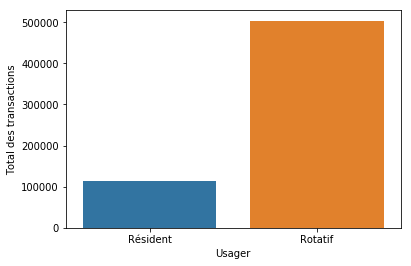

In [128]:
seaborn.barplot(x = "Usager", y = "Total des transactions",data = usager_total)

On remarque très clairement que le stationnement rotatif rappporte beaucoup plus d'argent (503 577, 20€) que le stationnement résidentiel (114 659, 60€).

Par une démarche similaire, nous pouvons également générer ce type de graphiques pour comparer le nombre de paiements qui ont été réalisés par l'intermédiaire d'une carte bancaire et par une carte " Paris Carte ".

In [143]:
mode = pandas.DataFrame(list(horo.mobiliers.aggregate([
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    }},
    { "$unwind" : "$transaction"},
    { "$group" : { "_id" : "$transaction.moyen de paiement", "Nombre de transactions" : { "$sum" : 1 }}},
    { "$project": { "Mode de paiement": "$_id", "Nombre de transactions": "$Nombre de transactions", "_id": 0 }}
])))
mode

,Mode de paiement,Nombre de transactions
0,Paris Carte,131329
1,CB,111202


On représente ce dataframe sous la forme d'un graphique qui compte le nombre de transactions par mode de paiement.

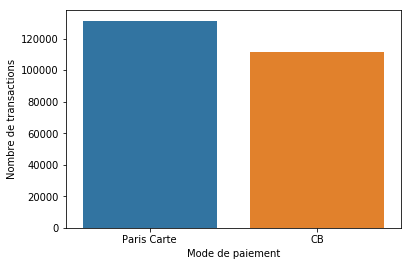

In [145]:
seaborn.barplot(x = "Mode de paiement", y = "Nombre de transactions", data = mode)

On en déduit que les personnes qui ont stationné à Paris ont eu un peu plus tendance à payer leur stationnement avec une " Paris Carte " qu'avec leur carte bancaire.

Après avoir étudié la répartition des modes de paiement ainsi que les totaux des transactions par type d'horodateurs, nous allons nous intéresser à la durée moyenne de stationnement par arrondissement que nous déterminons à l'aide du code suivant :

In [147]:
duree_moyenne = pandas.DataFrame(list(horo.mobiliers.aggregate([
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    }},
    { "$unwind" : "$transaction"},
    { "$group" : { "_id" : "$fields.arrondt", "Moyenne" : { "$avg" : "$transaction.durée payée (h)" }}},
    { "$project": { "Arrondissement": "$_id", "Durée moyenne de stationnement (en heure)": "$Moyenne", "_id": 0 }},
    { "$sort": {"Arrondissement": 1}}
])))
duree_moyenne

,Arrondissement,Durée moyenne de stationnement (en heure)
0,1,5.355431
1,2,5.149245
2,3,6.019835
3,4,7.788177
4,5,8.019469
5,6,7.416420
6,7,9.851005
7,8,6.193805
8,9,7.147338
9,10,7.887704


On affiche enfin le graphique modélisant la durée moyenne de stationnement (en heure) en fonction de chaque arrondissement par le biais du code ci-dessous :

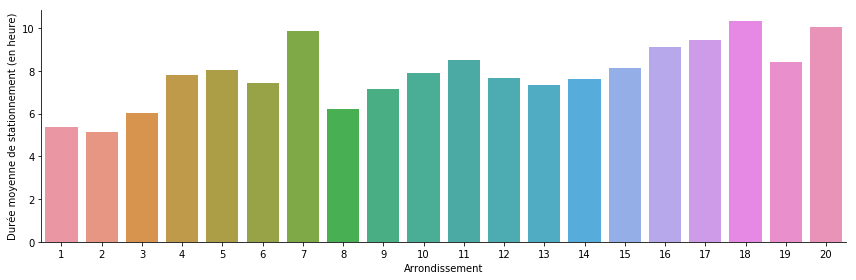

In [149]:
seaborn.catplot(x = "Arrondissement", y = "Durée moyenne de stationnement (en heure)",
                data = duree_moyenne, kind = "bar", height = 4, aspect = 3)

On constate donc que l'arrondissement où la durée moyenne de stationnement est la plus faible est le deuxième (5,149245 heures) alors que le dix-huitième arrondissement est celui où la durée moyenne de stationnement est la plus élevée (10,339233 heures).

En conclusion de ce devoir, nous pouvons dire que ce projet aura été une belle occasion d'appliquer les notions étudiées lors du cours __Analyse de données massives (ADDM)__ .
Nous nous sommes aperçus qu'il existait parfois de très grandes différences d'un arrondissement à un autre en ce qui concerne les types de mobiliers présents et la quantité totale de transactions (en euros). Toutefois, nous avons aussi remarqué que la répartition du mode de paiement dans tout Paris était relativement équitable. Enfin nous avons constaté que plus on s'approche du centre de Paris, plus la moyenne des transactions augmente en même temps que la durée moyenne de stationnement diminue très légèrement par rapport aux arrondissements se trouvant à la périphérie de la capitale française.